# CAPM 


$$
    r_M \sim \mathcal{N}(\alpha + \beta r_A, \varepsilon) \ \forall A
$$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

$$
    {\bf w} = (\Phi^T\Phi)^{-1} \Phi{\bf t}
$$

## Optimización de los pesos

In [11]:
#leo el insumo de las 5 acciones

data = pd.read_excel("PreciosPortf.xlsx", index_col=0)

#elimino las NA
rend = data.pct_change().dropna()

In [12]:
#solo me quedo con el ticker del instrumento y generamos la matriz de rendimientos
columnas2 = []
for c in data.columns:
    columnas2.append(c.replace(" MF Equity",""))

data.columns = columnas2
rend.columns = columnas2

In [13]:
rend_ports = rend.mean() * 252
rend_ports

ASURB       0.123539
GFNORTEO    0.078811
PE&OLES*    0.111053
WALMEX*     0.082426
IENOVA*     0.078997
dtype: float64

In [14]:
data

,ASURB,GFNORTEO,PE&OLES*,WALMEX*,IENOVA*
DATE,,,,,
2016-01-01,243.89,94.99,177.22,43.49,72.34
2016-01-04,238.29,91.79,175.90,42.84,72.98
2016-01-05,233.03,91.72,176.45,42.66,71.48
2016-01-06,231.97,91.63,172.68,42.38,70.94
2016-01-07,230.71,89.54,172.94,39.99,72.31
...,...,...,...,...,...
2019-12-30,354.06,105.00,200.37,54.18,86.96
2019-12-31,354.04,105.65,198.21,54.15,88.93
2020-01-01,354.04,105.65,198.21,54.15,88.93


In [15]:
#matriz de rendimientos diarios
rend

,ASURB,GFNORTEO,PE&OLES*,WALMEX*,IENOVA*
DATE,,,,,
2016-01-04,-0.022961,-0.033688,-0.007448,-0.014946,0.008847
2016-01-05,-0.022074,-0.000763,0.003127,-0.004202,-0.020554
2016-01-06,-0.004549,-0.000981,-0.021366,-0.006564,-0.007555
2016-01-07,-0.005432,-0.022809,0.001506,-0.056395,0.019312
2016-01-08,-0.004118,-0.007706,-0.003180,0.026007,-0.017148
...,...,...,...,...,...
2019-12-30,-0.005868,-0.035990,0.004562,-0.026240,-0.008777
2019-12-31,-0.000056,0.006190,-0.010780,-0.000554,0.022654
2020-01-01,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
#matriz de varianza-covarianza
rend.cov()

,ASURB,GFNORTEO,PE&OLES*,WALMEX*,IENOVA*
ASURB,0.000224,0.000086,0.000061,0.000036,0.000044
GFNORTEO,0.000086,0.000341,0.000094,0.000082,0.000082
PE&OLES*,0.000061,0.000094,0.000548,0.000041,0.000045
WALMEX*,0.000036,0.000082,0.000041,0.000215,0.000043
IENOVA*,0.000044,0.000082,0.000045,0.000043,0.000226


In [17]:
varcov = rend.cov()

In [20]:
#defino los pesos de la inversion
weights = np.random.random(5)
weights /= sum(weights)
weights

array([0.06035052, 0.2063187 , 0.15563259, 0.22169601, 0.35600218])

In [21]:
sum(weights)

0.9999999999999998

In [22]:
# rendimiento esperado (anualizado) de portafolio
(rend.mean() * weights).sum() * 252

0.08739600987810597

In [23]:
E_p = (rend.mean() @ weights) * 252
S_p = np.sqrt(weights.T @ (rend.cov() * 252) @ weights)

In [24]:
E_p, S_p

(0.08739600987810597, 0.16950333055426994)

In [26]:
#defino funciones para calculo de rendimiento esperado y varianza
def port_rend(weights, r):
    E_p = (r.mean() @ weights) * 252
    return E_p

def port_vol(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov() * 252) @ weights)
    return S_p

In [27]:
port_rend(weights, rend), port_vol(weights, rend)

(0.08739600987810597, 0.16950333055426994)

In [29]:
weights_sim = np.random.random((5000, 5))
weights_sim = weights_sim / weights_sim.sum(axis=1, keepdims=True)

rend_sim = np.apply_along_axis(port_rend, 1, weights_sim, r=rend)
vol_sim = np.apply_along_axis(port_vol, 1, weights_sim, r=rend)

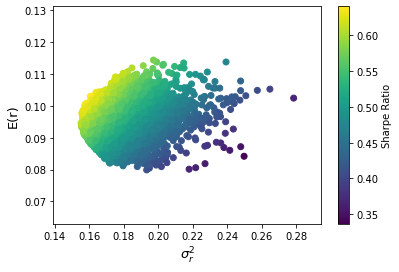

In [31]:
#Genero un vector que contenga el sharpe ratio para cada escenario simulado
sharpe_ratio = rend_sim / vol_sim

#lo grafico
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

### Creando la frontera eficiente

$$
\begin{aligned}
    \min \ &{\bf w}^T\Sigma {\bf w} \\
    s.t.\ & {\bf w}^T {\bf 1} = 1 \\
\end{aligned}
$$

In [33]:
from scipy.optimize import minimize

### Optimización sujeta a un rendimiento esperado


$$
\begin{aligned}
    \min \ &{\bf w}^T\Sigma {\bf w} \\
    s.t.\ & {\bf w}^T {\bf 1} = 1 \\
    &{\bf w}^T R_p = E
\end{aligned}
$$

In [38]:
#Definino las funciones que utilizaremos para los contraints de la optimizaciòn

N, M = rend.shape
w0  = np.random.randn(M)

def sum_weights(weights):
    return weights.sum() - 1 # == 0

def rend_esperado(w, E):
    return port_rend(w, rend) - E # == 0

def neg_weights(weights):
    return min(weights) #sin ventas en corto


In [39]:
#defino rango sobre el cual genrao la frontera (los limites son los mínimos y máximos del portafolio inicial)
#es decir, defino mi domino (eje x) para evaluar y graficar la funcion
rmin = rend_ports.min()
rmax = rend_ports.max()
rend_maxs = np.linspace(rmin,rmax)
rend_maxs

array([0.07881127, 0.07972409, 0.08063691, 0.08154972, 0.08246254,
       0.08337536, 0.08428817, 0.08520099, 0.0861138 , 0.08702662,
       0.08793944, 0.08885225, 0.08976507, 0.09067789, 0.0915907 ,
       0.09250352, 0.09341633, 0.09432915, 0.09524197, 0.09615478,
       0.0970676 , 0.09798041, 0.09889323, 0.09980605, 0.10071886,
       0.10163168, 0.1025445 , 0.10345731, 0.10437013, 0.10528294,
       0.10619576, 0.10710858, 0.10802139, 0.10893421, 0.10984702,
       0.11075984, 0.11167266, 0.11258547, 0.11349829, 0.11441111,
       0.11532392, 0.11623674, 0.11714955, 0.11806237, 0.11897519,
       0.119888  , 0.12080082, 0.12171364, 0.12262645, 0.12353927])

In [44]:
pesos_optimos = []
N, M = rend.shape
w_opt = np.random.randn(M)

for e in rend_maxs: #para cada uno de los rendimiento que voy a evaluar y graficar en el eje x
    constraints = [
        {"type": "eq", "fun": sum_weights},
        {"type": "eq", "fun": lambda w: rend_esperado(w, e)},
        {"type": "ineq", "fun": neg_weights}
    ]

    port1 = minimize(port_vol, w0, constraints=constraints, args=rend)
    w_opt = port1.x
    pesos_optimos.append(w_opt)
    
pesos_optimos

In [45]:
w_opt

array([ 9.99999993e-01,  1.33627918e-17,  3.98781724e-08, -2.83912106e-07,
        2.50894506e-07])

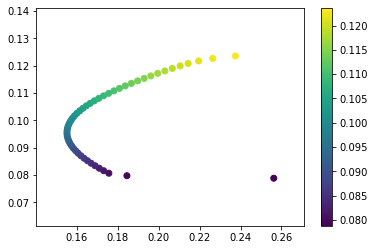

In [46]:
r_opt = []
v_opt = []
for w in pesos_optimos:
    r_opt.append(port_rend(w, rend))
    v_opt.append(port_vol(w, rend))

r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.scatter(v_opt, r_opt, c=r_opt)
plt.colorbar()

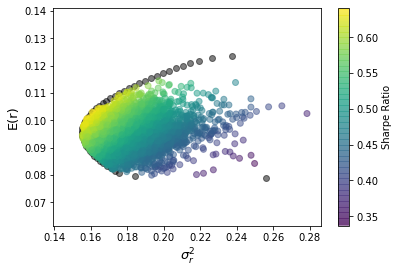

In [49]:
plt.scatter(v_opt,r_opt, c= "black",alpha=.5)
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio, alpha = 0.5)
plt.colorbar(label="Sharpe Ratio",)
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)",fontsize=13);

### Portafolio Tangencial

$$
    \mathbb{E}[R_C] = R_f + \frac{\mathbb{E}[R_p] - R_f}{\sigma_P}\sigma_C
$$

$$
\frac{\mathbb{E}[R_p] - R_f}{\sigma_P}
$$

In [63]:
#Selecciono los pesos del portafolio que genere el mayor rendimiento
pesos = pesos_optimos[r_opt.argmax()]
pesos

array([ 9.99999993e-01,  1.33627918e-17,  3.98781724e-08, -2.83912106e-07,
        2.50894506e-07])

In [51]:
rf = 0.06

def min_func_sharpe(weights):
    return - (port_rend(weights, rend) - rf) / port_vol(weights, rend)

constraints = [
    {"type": "eq", "fun": sum_weights}
]

f_sharpe = minimize(min_func_sharpe, w0, constraints=constraints) #argumentos:la funcion a minimizar, una semilla que le debo de meter
#como variable independiente (una valor de esta variable independiente es el que busca para minimiazar la funcion),
#y al final las restricciones o contraints
#por lo tanto aqui me aaroja las w (pesos) que maximizan(o minimizan con signo negativo en el return de la funcion) la funcion

In [52]:
f_sharpe  #el vector o valor de la variable independiente(en este caso los pesos) que maximizan la funcion es el que dice x:

     fun: -0.29185215088346483
     jac: array([-0.30316104, -0.30280036, -0.30284748, -0.30308822, -0.30292708])
 message: 'Optimization terminated successfully.'
    nfev: 250
     nit: 34
    njev: 34
  status: 0
 success: True
       x: array([ 0.73024578, -0.14005511,  0.17638075,  0.16452531,  0.06890327])

In [53]:
w_sharpe = f_sharpe.x  #le asigno el valor del array que dice x:, son los pesos  optimos para sharpe

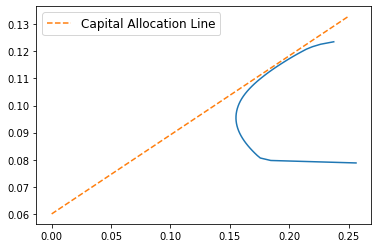

In [54]:
e_sharpe = port_rend(w_sharpe, rend)
vol_sharpe = port_vol(w_sharpe, rend)

sigma_c =  np.linspace(0, 0.25)
sharpe = rf + sigma_c * (e_sharpe - rf) / vol_sharpe

plt.plot(sigma_c, sharpe, linestyle="--", c="tab:orange", label="Capital Allocation Line")
plt.plot(v_opt, r_opt)
plt.legend(fontsize=12)

In [55]:
rf

0.06

In [56]:
e_sharpe

0.11776807100410697

In [57]:
vol_sharpe

0.19793608109187272

In [58]:
A=3.1
y_star= (e_sharpe-rf)/(A*vol_sharpe**2)
y_star

0.47563766345358843

In [59]:
E_util = rf+y_star*(e_sharpe-rf)
V_util = y_star*vol_sharpe

In [60]:
print(f"E[u]={E_util:0.3}")
print(f"V[u]={vol_sharpe:0.3}")

E[u]=0.0875
V[u]=0.198


In [67]:
def port_rend(weights):
    return np.sum(rend.mean()*weights)*252

In [68]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rend.cov()*252,weights)))

In [65]:
S=10000000
weights=w_sharpe

In [66]:
weights.sum()

1.0

In [73]:
#Calculo las colatilidades anuales de cada accion
vols_anuales =[]
for i in range(5):
    vols_anuales.append((np.sqrt(varcov.iloc[i,i]))*np.sqrt(252))
    
vols_anuales

[0.23747683132280767,
 0.2932968797198881,
 0.3715522629370927,
 0.2328565568585489,
 0.23842444015669614]

In [71]:
#calculo el vector de posiciones para cada accion
vector_posiciones =[]
for i in range(5):
    vector_posiciones.append(S*weights[i])
    
vector_posiciones

[7302457.804583293,
 -1400551.093585916,
 1763807.5002708987,
 1645253.0825640054,
 689032.7061677191]

In [72]:
sum(vector_posiciones)

10000000.0

In [77]:
var_individual_diario_95 = []
for i in range(5):
    var_individual_diario_95.append(1.65*vector_posiciones[i]*(vols_anuales[i]*(1/np.sqrt(252))))
    
var_individual_diario_99 = []
for i in range(5):
    var_individual_diario_99.append(2.33*vector_posiciones[i]*(vols_anuales[i]*(1/np.sqrt(252))))
    
var_individual_anual_95 = []
for i in range(5):
    var_individual_anual_95.append(1.65*vector_posiciones[i]*(vols_anuales[i]))
    
var_individual_anual_99 = []
for i in range(5):
    var_individual_anual_99.append(2.33*vector_posiciones[i]*(vols_anuales[i]))
    
        
var_individual_diario_95
var_individual_diario_99
var_individual_anual_95
var_individual_anual_99

[4040603.3789012064,
 -957111.028934271,
 1526957.7366987912,
 892641.5653625699,
 382777.6127172217]

In [78]:
total_var_individual_diario_95=sum(var_individual_diario_95)
total_var_individual_diario_99=sum(var_individual_diario_99)
total_var_individual_anual_95=sum(var_individual_anual_95)
total_var_individual_anual_99=sum(var_individual_anual_99)

In [82]:
print(f"el var total individual diario al 95 = {total_var_individual_diario_95}")
print(f"el var total individual diario al 99 = {total_var_individual_diario_99}")
print(f"el var total individual diario al 95 = {total_var_individual_anual_95}")
print(f"el var total individual diario al 99 = {total_var_individual_anual_99}")

el var total individual diario al 95 = 262565.92514332855
el var total individual diario al 99 = 370774.9124751245
el var total individual diario al 95 = 4168104.844133092
el var total individual diario al 99 = 5885869.264745518


In [90]:
#Cálculo de VaR diario del portafolio al 95%
S=10000000
F=1.65  #la ordenada al orgien del percentil 95 N(0,1)
VAR_diario_95= S*F*port_vol(weights)*1/np.sqrt(252)
print(f"VaR diario al 95 = {VAR_diario_95:,.2f}")

#Cálculo de VaR diario del portafolio al 99%
S=10000000
F=2.33  #la ordenada al orgien del percentil 99 N(0,1)
VAR_diario_99= S*F*port_vol(weights)*1/np.sqrt(252)
print(f"VaR diario al 99 = {VAR_diario_99:,.2f}")

#Cálculo de VaR anual del portafolio al 95%
S=10000000
F=1.65  #la ordenada al orgien del percentil 95 N(0,1)
VAR_anual_95= S*F*port_vol(weights)
print(f"VaR anual al 95 = {VAR_anual_95:,.2f}")

#Cálculo de VaR anual del portafolio al 99%
S=10000000
F=2.33  #la ordenada al orgien del percentil 99 N(0,1)
VAR_anual_99= S*F*port_vol(weights)
print(f"VaR anual al 99 = {VAR_anual_99:,.2f}")

VaR diario al 95 = 205,735.22
VaR diario al 99 = 290,523.07
VaR anual al 95 = 3,265,945.34
VaR anual al 99 = 4,611,910.69


In [ ]:
#Efecto de diversificacion

In [91]:
print(f"efecto de diversificacion diario al 95 = {total_var_individual_diario_95-VAR_diario_95}")
print(f"efecto de diversificacion diario al 99 = {total_var_individual_diario_99-VAR_diario_99}")
print(f"efecto de diversificacion anual al 95 = {total_var_individual_anual_95-VAR_anual_95}")
print(f"efecto de diversificacion anual al 99 = {total_var_individual_anual_95-VAR_anual_99}")

efecto de diversificacion diario al 95 = 56830.70704997488
efecto de diversificacion diario al 99 = 80251.84692511603
efecto de diversificacion anual al 95 = 902159.5061171921
efecto de diversificacion anual al 99 = -443805.845307542
